<a href="https://colab.research.google.com/github/tuananh11052000/CS114.K21/blob/master/Sacrasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download file data từ kaggle và giải nén và upload lên  

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Thực hiện import các thư viện cần thiết

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import string 
from string import digits
from string import punctuation
import pandas as pd
import glob

Thực hiện đọc dữ liệu dataset bằng cách:

*   Sử dụng hàm đọc file json của thư viện pandas
*   Khi đọc xong ta sẽ thu được các cột là 'article_link', 'Headline', 'is-sarcastic'
*   Sau đó sử dụng hàm drop() để xoá đi cột không cần thiết



In [17]:
path = '/content/drive/My Drive/Colab Notebooks/Sacarsm/Sacarsm_Headlines_Dataset.json'
df = pd.read_json(path, lines = True)
df = df.drop(['article_link'], axis = 1)
print (df)

                                                headline  is_sarcastic
0      former versace store clerk sues over secret 'b...             0
1      the 'roseanne' revival catches up to our thorn...             0
2      mom starting to fear son's web series closest ...             1
3      boehner just wants wife to listen, not come up...             1
4      j.k. rowling wishes snape happy birthday in th...             0
...                                                  ...           ...
26704               american politics in moral free-fall             0
26705                            america's best 20 hikes             0
26706                              reparations and obama             0
26707  israeli ban targeting boycott supporters raise...             0
26708                  gourmet gifts for the foodie 2014             0

[26709 rows x 2 columns]


Thực hiện loại bỏ các dấu chấm câu và số trong các header và lưu vào mảng h1_cleaan
*   Hàm maketrans() được sử dụng với chức năng ánh xạ các dấu câu hoặc số thành NAN để phục vụ cho hàm translate
*   Hàm translates được sử dụng để xoá các dấu câu và số, bằng cách sử dụng kết quả của hàm maketans(), thực hiện map với mỗi dấu câu nào xuất hiện thì thực hiện thay thế bằng giá trị NAN (giá trị được thiết lập trong hàm maketans() mục đích xoá đi các dấu câu và số)
*   Kết thúc bước này ta thu được một mảng gồm các phần tử là các header đã được lược bỏ di dấu câu và số.

In [18]:
hl_clean = []
print(str.maketrans('', '', punctuation))
for i in df['headline']:
  clean = i.translate(str.maketrans('', '', punctuation))
  clean = clean.translate(str.maketrans('', '', digits))
  hl_clean.append(clean)

print('Before: ')
print(df['headline'][37])
print ('After: ')
print (hl_clean[37])
print(hl_clean)

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}
Before: 
'moana' sails straight to the top of the box office with massive $81.1 million opening
After: 
moana sails straight to the top of the box office with massive  million opening
['former versace store clerk sues over secret black code for minority shoppers', 'the roseanne revival catches up to our thorny political mood for better and worse', 'mom starting to fear sons web series closest thing she will have to grandchild', 'boehner just wants wife to listen not come up with alternative debtreduction ideas', 'jk rowling wishes snape happy birthday in the most magical way', 'advancing the worlds women', 'the fascinating case for eating labgrown meat', 'this ceo wi

*   Trong bước này, với mỗi phần tử trong mảng h1_clean đã tạo ra ở trên, thực hiện chia mỗi header như vậy thành một mảng với các phần tử là các từ dươn lẻ được tách ra nhờ hàm split()
*   Kết thúc bước này ta đã có một bộ mà trong đó các header được chuyển thành một mảng chứa các từ xuất hiện trong header đó

In [19]:
hl_tokens = []
for i in hl_clean:
  i = i.split()
  hl_tokens.append(i)
print(hl_tokens)
print ('before: ')
print (hl_clean[100])
print ('after: ')
print (hl_tokens[100])

[['former', 'versace', 'store', 'clerk', 'sues', 'over', 'secret', 'black', 'code', 'for', 'minority', 'shoppers'], ['the', 'roseanne', 'revival', 'catches', 'up', 'to', 'our', 'thorny', 'political', 'mood', 'for', 'better', 'and', 'worse'], ['mom', 'starting', 'to', 'fear', 'sons', 'web', 'series', 'closest', 'thing', 'she', 'will', 'have', 'to', 'grandchild'], ['boehner', 'just', 'wants', 'wife', 'to', 'listen', 'not', 'come', 'up', 'with', 'alternative', 'debtreduction', 'ideas'], ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'in', 'the', 'most', 'magical', 'way'], ['advancing', 'the', 'worlds', 'women'], ['the', 'fascinating', 'case', 'for', 'eating', 'labgrown', 'meat'], ['this', 'ceo', 'will', 'send', 'your', 'kids', 'to', 'school', 'if', 'you', 'work', 'for', 'his', 'company'], ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'], ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'for', 'the', 'ages'], ['airline', 'passengers', 'tackl

Sử dụng nltk để tải xuống tài nguyên của packet nltk
Tìm ra các từ nào xuất hiện trong các header và thêm vào từ điển để phục vụ cho các bước tiếp theo. 

In [20]:
#Use Bag of words
import nltk
nltk.download('punkt')
wordfreq = {}
#Build a dictionary to save how many time the word appear
for i in hl_tokens:
  for j in i:
    if (j not in wordfreq.keys()):
      wordfreq[j] = 1
    else:
      wordfreq[j] += 1
print(len(wordfreq))
print(wordfreq)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
27653
{'former': 106, 'versace': 1, 'store': 46, 'clerk': 10, 'sues': 17, 'over': 476, 'secret': 90, 'black': 253, 'code': 18, 'for': 3305, 'minority': 15, 'shoppers': 3, 'the': 5391, 'roseanne': 3, 'revival': 11, 'catches': 14, 'up': 765, 'to': 8223, 'our': 177, 'thorny': 3, 'political': 83, 'mood': 13, 'better': 123, 'and': 1915, 'worse': 40, 'mom': 196, 'starting': 45, 'fear': 46, 'sons': 36, 'web': 19, 'series': 62, 'closest': 7, 'thing': 144, 'she': 197, 'will': 556, 'have': 492, 'grandchild': 2, 'boehner': 27, 'just': 578, 'wants': 138, 'wife': 78, 'listen': 24, 'not': 734, 'come': 103, 'with': 1801, 'alternative': 11, 'debtreduction': 1, 'ideas': 43, 'jk': 7, 'rowling': 7, 'wishes': 42, 'snape': 2, 'happy': 62, 'birthday': 64, 'in': 4187, 'most': 259, 'magical': 32, 'way': 257, 'advancing': 2, 'worlds': 92, 'women': 324, 'fascinating': 4, 'case': 94, 'eating': 66, 'labgrown'

[106   1  46 ...   1   1   1]


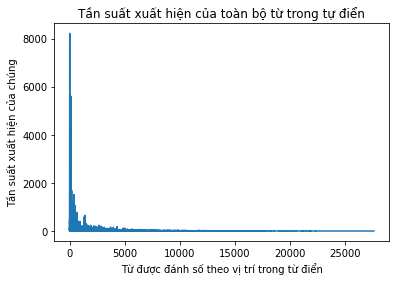

In [21]:
import matplotlib.pyplot as plt
import numpy as np
a = wordfreq.values()
a = list(a)
a = np.array(a)
print(a)
plt.plot(a)
plt.title("Tần suất xuất hiện của toàn bộ từ trong tự điển")
plt.xlabel("Từ được đánh số theo vị trí trong từ điển")
plt.ylabel("Tần suất xuất hiện của chúng")
plt.show()

Import packet heapq để sử dụng cho việc lấy ra các từ xuất hiện nhiều nhất

In [22]:
import heapq
most_freq = heapq.nlargest(700, wordfreq, key=wordfreq.get)
print (most_freq)

['to', 'of', 'the', 'in', 'for', 'a', 'on', 'and', 'with', 'is', 'new', 'trump', 'man', 'from', 'at', 'about', 'you', 'this', 'by', 'after', 'be', 'how', 'out', 'it', 'that', 'as', 'up', 'not', 'are', 'your', 'what', 'his', 'he', 'just', 'who', 'us', 'has', 'will', 'more', 'all', 'into', 'report', 'one', 'why', 'have', 'area', 'over', 'donald', 'says', 'day', 'woman', 'can', 'its', 'time', 'no', 'first', 'like', 'get', 'her', 'trumps', 'people', 'an', 'i', 'now', 'obama', 'house', 'off', 'life', 'make', 'still', 'women', 'was', 'than', 'my', 'white', 'we', 'back', 'clinton', 'down', 'if', 'when', 'world', 'years', 'could', 'family', 'their', 'do', 'before', 'americans', 'most', 'way', 'black', 'they', 'gop', 'study', 'year', 'bill', 'yearold', 'should', 'would', 'so', 'him', 'best', 'police', 'only', 'watch', 'really', 'but', 'american', 'being', 'show', 'school', 'cant', 'know', 'things', 'good', 'home', 'during', 'death', 'president', 'finds', 'say', 'video', 'nation', 'going', 'love

Với mỗi header tìm ra xem những từ trong header đó có nằm trong 700 từ thường xuyên xuất hiện hay không và biến nó thành một vector

In [23]:
#bag of word
array = []
count = 0
for i in hl_tokens:
  tmp = []
  for j in most_freq:
    if (j in i):
      tmp.append(1)
    else:
      tmp.append(0)
  array.append(tmp)
print(array[1])

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Thực hiện gán phần data và mảng array thu được ửo sell trước đó, Lấy bộ nhãn và gán vào biến Y.
*   Chia train test tỉ lệ 9 : 1
 

In [24]:
X = array
Y = df['is_sarcastic']
print (len(X))
print (len(Y))

X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 42)
print (len(X_train))
print (len (Y_train))

26709
26709
24038
24038


In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
Y_pred = model.predict(X_test)
print ("Accurancy score: ", accuracy_score(Y_test, Y_pred))

Accurancy score:  0.7300636465743168
